In [326]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

HPV = pd.read_csv('New.csv',header=0)

info_HPV = HPV.info()
print (info_HPV)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 726 non-null    int64  
 1   Number of sexual partners           726 non-null    int64  
 2   First sexual intercourse            726 non-null    int64  
 3   Num of pregnancies                  726 non-null    int64  
 4   Smokes                              726 non-null    int64  
 5   Smokes (years)                      726 non-null    float64
 6   Smokes (packs/year)                 726 non-null    float64
 7   Hormonal Contraceptives             726 non-null    int64  
 8   Hormonal Contraceptives (years)     726 non-null    float64
 9   IUD                                 726 non-null    int64  
 10  IUD (years)                         726 non-null    float64
 11  STDs                                726 non-n

In [327]:
from sklearn.model_selection import train_test_split
print(type(HPV))

x= HPV[['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:HPV','Dx:CIN','Dx']]
y= HPV[['Final Result']]

<class 'pandas.core.frame.DataFrame'>


In [328]:
importances = forest.feature_importances_
print("Importance",importances)

Importance [0.11609446 0.04256873 0.06890136 0.06169952 0.01632007 0.04369054
 0.03697966 0.01525361 0.10347985 0.02403218 0.0834646  0.02203062
 0.04513458 0.01850257 0.         0.00176455 0.01957665 0.00608031
 0.0001438  0.02149675 0.00022654 0.         0.03866221 0.
 0.00196302 0.04313128 0.04860794 0.063028   0.01992775 0.03723885]


In [329]:
x_columns = HPV.columns[0:-6]
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print (feat_labels[indices[f]], importances[indices[f]])

Age 0.1160944641875375
Hormonal Contraceptives (years) 0.10347984806888856
IUD (years) 0.08346460137854177
First sexual intercourse 0.06890135976057639
Dx:CIN 0.063027996720188
Num of pregnancies 0.06169952218597151
Dx:Cancer 0.048607939422658356
STDs (number) 0.04513457695683151
Smokes (years) 0.043690542669855136
STDs: Number of diagnosis 0.04313127954993226
Number of sexual partners 0.04256872907441089
STDs:HIV 0.03866221236711615
Dx:HPV 0.03723885151081336
Smokes (packs/year) 0.03697965831226897
IUD 0.024032176373451574
STDs 0.022030621609048506
STDs:genital herpes 0.021496745621668867
Dx 0.019927750387626536
STDs:vulvo-perineal condylomatosis 0.01957665420783488
STDs:condylomatosis 0.018502567124842384
Smokes 0.016320068973629125
Hormonal Contraceptives 0.015253606686036208
STDs:syphilis 0.006080306337425586
STDs:HPV 0.0019630222502413737
STDs:vaginal condylomatosis 0.001764552819960064
STDs:molluscum contagiosum 0.0002265432110370267
STDs:pelvic inflammatory disease 0.00014380223

In [330]:
forest = RandomForestClassifier(n_estimators=1000, random_state=0, criterion='gini', max_depth=5, n_jobs=1)
forest.fit(x_train, y_train)

/Users/meredith/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [331]:
Y_pred = forest.predict(x)
accuracy_score(Y, Y_pred)

0.8842975206611571

In [332]:
precision_score(Y, Y_pred)

0.7647058823529411

In [333]:
recall_score(Y, Y_pred)

0.13978494623655913

In [334]:
f1_score(Y, Y_pred)

0.23636363636363633

In [335]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5, random_state=0)
feat_labels = HPV.columns[0:-6]

print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(363, 30)
(363, 1)
(363, 30)
(363, 1)


In [336]:
forest.fit(x_train, y_train)
y_trainP = forest.predict(x_train)

/Users/meredith/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [337]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_trainP))

0.9035812672176309


In [338]:
forest.fit(x_train, y_train)
y_testP = forest.predict(x_test)
print(y_testP)

/Users/meredith/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [339]:
print(accuracy_score(y_test,y_testP))

0.8650137741046832


In [340]:
print(precision_score(y_train,y_trainP))
print(precision_score(y_test,y_testP))

1.0
0.3333333333333333


In [341]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_trainP, y_testP)
print(cm)

[[346   6]
 [ 11   0]]


In [342]:
print(f1_score(y_train,y_trainP))
print(f1_score(y_test,y_testP))

0.3859649122807018
0.07547169811320754


In [343]:
label_binarize(y_test.iloc[:,0:1],classes=(0,1))
y_test.iloc[:,0:1]
y_test.head(20)

,Final Result
571,0
498,0
586,0
457,1
258,0
235,0
465,0
40,0
31,0
14,0


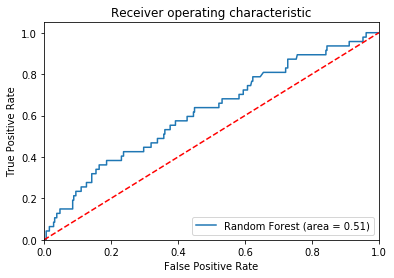

In [344]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, forest.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()